<a href="https://colab.research.google.com/github/Arinjay11020/Capstone-Speech-Sentiment-Analysis/blob/main/RAVDESS_preprocessing%2C_augumentation_and_feature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import soundfile as sf

In [2]:
filename="/content/drive/MyDrive/Capstone/RAVDESS"

In [3]:
lis=os.listdir(filename)
lis

['Actor_24',
 'Actor_22',
 'Actor_21',
 'Actor_23',
 'Actor_17',
 'Actor_20',
 'Actor_15',
 'Actor_19',
 'Actor_18',
 'Actor_16',
 'Actor_14',
 'Actor_05',
 'Actor_11',
 'Actor_12',
 'Actor_10',
 'Actor_07',
 'Actor_08',
 'Actor_13',
 'Actor_09',
 'Actor_06',
 'Actor_04',
 'Actor_02',
 'Actor_01',
 'Actor_03']

In [4]:
searcher=pd.DataFrame(columns=["Actor","Filename"])

In [5]:
li=[]
k=0
for i in lis:
  li=os.listdir(filename+"/"+i)
  for j in li:
    searcher.loc[k]=[i,j]
    k+=1
searcher.head()

,Actor,Filename
0,Actor_24,03-01-04-01-01-01-24.wav
1,Actor_24,03-01-04-01-02-01-24.wav
2,Actor_24,03-01-01-01-02-01-24.wav
3,Actor_24,03-01-05-01-01-02-24.wav
4,Actor_24,03-01-04-01-01-02-24.wav


In [6]:
searcher["Actor"].unique()

array(['Actor_24', 'Actor_22', 'Actor_21', 'Actor_23', 'Actor_17',
       'Actor_20', 'Actor_15', 'Actor_19', 'Actor_18', 'Actor_16',
       'Actor_14', 'Actor_05', 'Actor_11', 'Actor_12', 'Actor_10',
       'Actor_07', 'Actor_08', 'Actor_13', 'Actor_09', 'Actor_06',
       'Actor_04', 'Actor_02', 'Actor_01', 'Actor_03'], dtype=object)

In [7]:
def modality(txt):
  txt=txt.split("-")[0]
  if txt=="01":
    return "Full AV"
  elif txt=="02":
    return "Video Only"
  elif txt=="03":
    return "Audio Only"
  else:
    return "None"

In [8]:
def vocal_channel(txt):
  txt=txt.split("-")[1]
  if txt=="01":
    return "Speech"
  elif txt=="02":
    return "Song"
  else:
    return "None"

In [9]:
def emotion(txt):
  txt=txt.split("-")[2]
  if txt=="01":
    return "Neutral"
  elif txt=="02":
    return "Calm"
  elif txt=="03":
    return "Happy"
  elif txt=="04":
    return "Sad"
  elif txt=="05":
    return "Angry"
  elif txt=="06":
    return "Fearful"
  elif txt=="07":
    return "Disgust"
  elif txt=="08":
    return "Surprised"
  else:
    return "None"

In [10]:
def emotional_intensity(txt):
  txt=txt.split("-")[3]
  if txt=="01":
    return "Normal"
  elif txt=="02":
    return "Strong"
  else:
    return "None"

In [11]:
def statement(txt):
  txt=txt.split("-")[4]
  if txt=="01":
    return "Kids are talking by the door"
  elif txt=="02":
    return "Dogs are sitting by the door"
  else:
    return "None"

In [12]:
def repetition(txt):
  txt=txt.split("-")[5]
  return int(txt)

In [13]:
def actor(txt):
  txt=txt.split("-")[6][:2]
  if int(txt)%2:
    return "Male"
  else:
    return "Female"

In [14]:
searcher["Modality"]=searcher["Filename"].apply(modality)
searcher.head()

,Actor,Filename,Modality
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only


In [15]:
searcher["Modality"].unique()

array(['Audio Only'], dtype=object)

In [16]:
searcher["Vocal Channel"]=searcher["Filename"].apply(vocal_channel)
searcher.head()

,Actor,Filename,Modality,Vocal Channel
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only,Speech
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only,Speech
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only,Speech
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only,Speech
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only,Speech


In [17]:
searcher["Vocal Channel"].unique()

array(['Speech'], dtype=object)

In [18]:
searcher["Emotion"]=searcher["Filename"].apply(emotion)
searcher.head()

,Actor,Filename,Modality,Vocal Channel,Emotion
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only,Speech,Sad
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only,Speech,Sad
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only,Speech,Neutral
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only,Speech,Angry
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only,Speech,Sad


In [19]:
searcher["Emotion"].unique()

array(['Sad', 'Neutral', 'Angry', 'Happy', 'Disgust', 'Calm', 'Fearful',
       'Surprised'], dtype=object)

In [20]:
searcher["Intensity"]=searcher["Filename"].apply(emotional_intensity)
searcher.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only,Speech,Sad,Normal
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only,Speech,Sad,Normal
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only,Speech,Neutral,Normal
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only,Speech,Angry,Normal
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only,Speech,Sad,Normal


In [21]:
searcher["Intensity"].unique()

array(['Normal', 'Strong'], dtype=object)

In [22]:
searcher["Statement"]=searcher["Filename"].apply(statement)
searcher.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door


In [23]:
searcher["Repetition"]=searcher["Filename"].apply(repetition)
searcher.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2


In [24]:
searcher["Gender"]=searcher["Filename"].apply(actor)
searcher.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Gender
0,Actor_24,03-01-04-01-01-01-24.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1,Female
1,Actor_24,03-01-04-01-02-01-24.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1,Female
2,Actor_24,03-01-01-01-02-01-24.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1,Female
3,Actor_24,03-01-05-01-01-02-24.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2,Female
4,Actor_24,03-01-04-01-01-02-24.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2,Female


In [25]:
searcher["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [26]:
searcher.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1440 entries, 0 to 1439
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Actor          1440 non-null   object
 1   Filename       1440 non-null   object
 2   Modality       1440 non-null   object
 3   Vocal Channel  1440 non-null   object
 4   Emotion        1440 non-null   object
 5   Intensity      1440 non-null   object
 6   Statement      1440 non-null   object
 7   Repetition     1440 non-null   int64 
 8   Gender         1440 non-null   object
dtypes: int64(1), object(8)
memory usage: 112.5+ KB


In [27]:
searcher.to_csv("RAVDESS searcher.csv")

In [28]:
import librosa

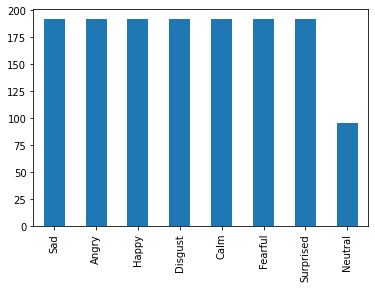

In [29]:
import matplotlib.pyplot as plt
searcher["Emotion"].value_counts().plot(kind="bar")

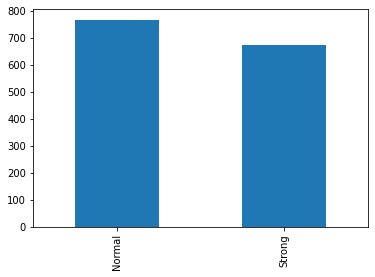

In [30]:
searcher["Intensity"].value_counts().plot(kind="bar")

In [31]:
def noise(data):
    noise_amp = 0.035*np.random.uniform()*np.amax(data)
    data = data + noise_amp*np.random.normal(size=data.shape[0])
    return data

In [32]:
def stretch(data, rate=0.8):
    return librosa.effects.time_stretch(data, rate)

In [33]:
def pitch(data, sampling_rate, pitch_factor=0.7):
    return librosa.effects.pitch_shift(data, sampling_rate, pitch_factor)

In [34]:
Noise=pd.DataFrame(columns=searcher.columns)
Pitch=pd.DataFrame(columns=searcher.columns)
Stretch=pd.DataFrame(columns=searcher.columns)

In [35]:
from IPython.display import Audio
data,sample_rate=librosa.load(filename+"/"+searcher["Actor"][0]+"/"+searcher["Filename"][0])
Audio(data,rate=sample_rate)
data1=noise(data)
sf.write("/content/Noise/x.wav",data1,sample_rate)
Audio(data1,rate=sample_rate)

In [36]:
searcher.columns

Index(['Actor', 'Filename', 'Modality', 'Vocal Channel', 'Emotion',
       'Intensity', 'Statement', 'Repetition', 'Gender'],
      dtype='object')

In [37]:
k=0
f_noise="/content/Noise/"
for i in range(len(searcher)):
  data,sample_rate=librosa.load(filename+"/"+searcher["Actor"][i]+"/"+searcher["Filename"][i])
  data1=noise(data)
  sf.write(f_noise+searcher["Filename"][i][:-4]+"-Noise"+".wav",data1,sample_rate)
  Noise.loc[k]=[searcher["Actor"][i],f_noise+searcher["Filename"][i][:-4]+"-Noise"+".wav",searcher["Modality"][i],searcher["Vocal Channel"][i],searcher["Emotion"][i],searcher["Intensity"][i],searcher["Statement"][i],searcher["Repetition"][i],searcher["Gender"][i]]
  k+=1
Noise.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Gender
0,Actor_24,/content/Noise/03-01-04-01-01-01-24-Noise.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1,Female
1,Actor_24,/content/Noise/03-01-04-01-02-01-24-Noise.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1,Female
2,Actor_24,/content/Noise/03-01-01-01-02-01-24-Noise.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1,Female
3,Actor_24,/content/Noise/03-01-05-01-01-02-24-Noise.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2,Female
4,Actor_24,/content/Noise/03-01-04-01-01-02-24-Noise.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2,Female


In [38]:
print(searcher.shape)
print(Noise.shape)

(1440, 9)
(1440, 9)


In [39]:
k=0
f_pitch="/content/Pitch/"
for i in range(len(searcher)):
  data,sample_rate=librosa.load(filename+"/"+searcher["Actor"][i]+"/"+searcher["Filename"][i])
  data1=pitch(data,sample_rate)
  sf.write(f_pitch+searcher["Filename"][i][:-4]+"-Pitch"+".wav",data1,sample_rate)
  Pitch.loc[k]=[searcher["Actor"][i],f_pitch+searcher["Filename"][i][:-4]+"-Pitch"+".wav",searcher["Modality"][i],searcher["Vocal Channel"][i],searcher["Emotion"][i],searcher["Intensity"][i],searcher["Statement"][i],searcher["Repetition"][i],searcher["Gender"][i]]
  k+=1
Pitch.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Gender
0,Actor_24,/content/Noise/03-01-04-01-01-01-24-Pitch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1,Female
1,Actor_24,/content/Noise/03-01-04-01-02-01-24-Pitch.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1,Female
2,Actor_24,/content/Noise/03-01-01-01-02-01-24-Pitch.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1,Female
3,Actor_24,/content/Noise/03-01-05-01-01-02-24-Pitch.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2,Female
4,Actor_24,/content/Noise/03-01-04-01-01-02-24-Pitch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2,Female


In [40]:
k=0
f_stretch="/content/Stretch/"
for i in range(len(searcher)):
  data,sample_rate=librosa.load(filename+"/"+searcher["Actor"][i]+"/"+searcher["Filename"][i])
  data1=stretch(data)
  sf.write(f_stretch+searcher["Filename"][i][:-4]+"-Stretch"+".wav",data1,sample_rate)
  Stretch.loc[k]=[searcher["Actor"][i],f_stretch+searcher["Filename"][i][:-4]+"-Stretch"+".wav",searcher["Modality"][i],searcher["Vocal Channel"][i],searcher["Emotion"][i],searcher["Intensity"][i],searcher["Statement"][i],searcher["Repetition"][i],searcher["Gender"][i]]
  k+=1
Stretch.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Gender
0,Actor_24,/content/Noise/03-01-04-01-01-01-24-Stretch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1,Female
1,Actor_24,/content/Noise/03-01-04-01-02-01-24-Stretch.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1,Female
2,Actor_24,/content/Noise/03-01-01-01-02-01-24-Stretch.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1,Female
3,Actor_24,/content/Noise/03-01-05-01-01-02-24-Stretch.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2,Female
4,Actor_24,/content/Noise/03-01-04-01-01-02-24-Stretch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2,Female


In [42]:
X=[]
for i in range(len(searcher)):
  data,sample_rate=librosa.load(filename+"/"+searcher["Actor"][i]+"/"+searcher["Filename"][i])
  mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features = np.mean(mfccs.T,axis=0)
  X.append(mfccs_scaled_features)

In [43]:
for i in range(len(Noise)):
  data,sample_rate=librosa.load(Noise["Filename"][i])
  mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs.T,axis=0)
  X.append(mfccs_scaled_features)

In [45]:
Pitch.shape

(1440, 9)

In [46]:
Stretch.shape

(1440, 9)

In [47]:
Pitch["Filename"]=Pitch["Filename"].str.replace("Noise","Pitch")
Pitch.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Gender
0,Actor_24,/content/Pitch/03-01-04-01-01-01-24-Pitch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1,Female
1,Actor_24,/content/Pitch/03-01-04-01-02-01-24-Pitch.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1,Female
2,Actor_24,/content/Pitch/03-01-01-01-02-01-24-Pitch.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1,Female
3,Actor_24,/content/Pitch/03-01-05-01-01-02-24-Pitch.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2,Female
4,Actor_24,/content/Pitch/03-01-04-01-01-02-24-Pitch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2,Female


In [48]:
Stretch["Filename"]=Stretch["Filename"].str.replace("Noise","Stretch")
Stretch.head()

,Actor,Filename,Modality,Vocal Channel,Emotion,Intensity,Statement,Repetition,Gender
0,Actor_24,/content/Stretch/03-01-04-01-01-01-24-Stretch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,1,Female
1,Actor_24,/content/Stretch/03-01-04-01-02-01-24-Stretch.wav,Audio Only,Speech,Sad,Normal,Dogs are sitting by the door,1,Female
2,Actor_24,/content/Stretch/03-01-01-01-02-01-24-Stretch.wav,Audio Only,Speech,Neutral,Normal,Dogs are sitting by the door,1,Female
3,Actor_24,/content/Stretch/03-01-05-01-01-02-24-Stretch.wav,Audio Only,Speech,Angry,Normal,Kids are talking by the door,2,Female
4,Actor_24,/content/Stretch/03-01-04-01-01-02-24-Stretch.wav,Audio Only,Speech,Sad,Normal,Kids are talking by the door,2,Female


In [49]:
for i in range(len(Pitch)):
  data,sample_rate=librosa.load(Pitch["Filename"][i])
  mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs.T,axis=0)
  X.append(mfccs_scaled_features)

In [50]:
for i in range(len(Stretch)):
  data,sample_rate=librosa.load(Stretch["Filename"][i])
  mfccs=librosa.feature.mfcc(y=data,sr=sample_rate,n_mfcc=40)
  mfccs_scaled_features=np.mean(mfccs.T,axis=0)
  X.append(mfccs_scaled_features)

In [51]:
extracted_features_df=pd.DataFrame(X,columns=[i for i in range(40)])
extracted_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-682.786560,49.554104,-2.957227,6.492600,-4.533283,-5.577244,-14.285715,-6.971066,-11.032431,-4.461883,...,-1.899701,0.472623,0.662825,4.226065,5.288602,6.437543,4.037335,1.342614,-0.177404,-0.844319
1,-698.393066,45.490097,-8.718443,4.098103,-10.368684,-3.493486,-12.813138,-12.302380,-10.428462,-6.491343,...,1.487505,4.522738,4.723077,8.205063,7.109620,6.411415,2.029982,0.944977,-1.118757,-0.619505
2,-683.541504,45.790791,-8.732436,5.652276,-10.264516,-3.631711,-13.565022,-10.328115,-7.746146,-3.926473,...,5.171337,4.069837,0.605757,1.795494,1.590863,3.035923,-0.856015,-3.284239,-3.686345,-0.404304
3,-510.976746,31.709919,-19.523634,1.721714,-13.628480,-9.110020,-9.474399,-6.853446,-10.732971,0.213203,...,2.565188,1.484451,-0.969694,1.011588,-1.042750,1.889726,-1.276625,-2.258035,-1.863009,1.118838
4,-724.068054,53.929638,0.768267,10.190289,-5.725431,-1.370537,-11.506711,-6.727295,-8.388384,-1.278562,...,3.328666,8.637044,8.944055,10.673691,7.450894,4.113879,1.462258,-0.010495,-0.115005,1.258699


In [52]:
extracted_features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5760 entries, 0 to 5759
Data columns (total 40 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5760 non-null   float32
 1   1       5760 non-null   float32
 2   2       5760 non-null   float32
 3   3       5760 non-null   float32
 4   4       5760 non-null   float32
 5   5       5760 non-null   float32
 6   6       5760 non-null   float32
 7   7       5760 non-null   float32
 8   8       5760 non-null   float32
 9   9       5760 non-null   float32
 10  10      5760 non-null   float32
 11  11      5760 non-null   float32
 12  12      5760 non-null   float32
 13  13      5760 non-null   float32
 14  14      5760 non-null   float32
 15  15      5760 non-null   float32
 16  16      5760 non-null   float32
 17  17      5760 non-null   float32
 18  18      5760 non-null   float32
 19  19      5760 non-null   float32
 20  20      5760 non-null   float32
 21  21      5760 non-null   float32
 22  

In [57]:
con=pd.concat([searcher["Emotion"],Noise["Emotion"],Pitch["Emotion"],Stretch["Emotion"]])
con.head()

0        Sad
1        Sad
2    Neutral
3      Angry
4        Sad
Name: Emotion, dtype: object

In [61]:
con.index=[i for i in range(len(con))]

In [62]:
con.tail()

5755      Disgust
5756      Fearful
5757    Surprised
5758    Surprised
5759      Disgust
Name: Emotion, dtype: object

In [67]:
con1=pd.concat([searcher["Intensity"],Noise["Intensity"],Pitch["Intensity"],Stretch["Intensity"]])
con1.index=[i for i in range(len(con1))]

In [68]:
extracted_features_df["Emotion"]=con
extracted_features_df["Intensity"]=con1
extracted_features_df.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,Emotion,Intensity
0,-682.786560,49.554104,-2.957227,6.492600,-4.533283,-5.577244,-14.285715,-6.971066,-11.032431,-4.461883,...,0.662825,4.226065,5.288602,6.437543,4.037335,1.342614,-0.177404,-0.844319,Sad,Normal
1,-698.393066,45.490097,-8.718443,4.098103,-10.368684,-3.493486,-12.813138,-12.302380,-10.428462,-6.491343,...,4.723077,8.205063,7.109620,6.411415,2.029982,0.944977,-1.118757,-0.619505,Sad,Normal
2,-683.541504,45.790791,-8.732436,5.652276,-10.264516,-3.631711,-13.565022,-10.328115,-7.746146,-3.926473,...,0.605757,1.795494,1.590863,3.035923,-0.856015,-3.284239,-3.686345,-0.404304,Neutral,Normal
3,-510.976746,31.709919,-19.523634,1.721714,-13.628480,-9.110020,-9.474399,-6.853446,-10.732971,0.213203,...,-0.969694,1.011588,-1.042750,1.889726,-1.276625,-2.258035,-1.863009,1.118838,Angry,Normal
4,-724.068054,53.929638,0.768267,10.190289,-5.725431,-1.370537,-11.506711,-6.727295,-8.388384,-1.278562,...,8.944055,10.673691,7.450894,4.113879,1.462258,-0.010495,-0.115005,1.258699,Sad,Normal


In [69]:
extracted_features_df.to_csv("RAVDESS mfcc.csv")